In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_df = pd.read_csv('../data/raw/recommendation_training_data.csv')

In [3]:
music_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [5]:
music_df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [6]:
music_df.shape

(28362, 24)

In [7]:
music_df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [8]:
duplicate_rows = music_df[music_df.duplicated()]

# Check for duplicate rows based on specific columns
# duplicate_rows = df[df.duplicated(subset=['column2'])]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [9]:
music_df['genre'].value_counts()


genre
pop        7038
country    5444
blues      4603
rock       4032
jazz       3844
reggae     2497
hip hop     904
Name: count, dtype: int64

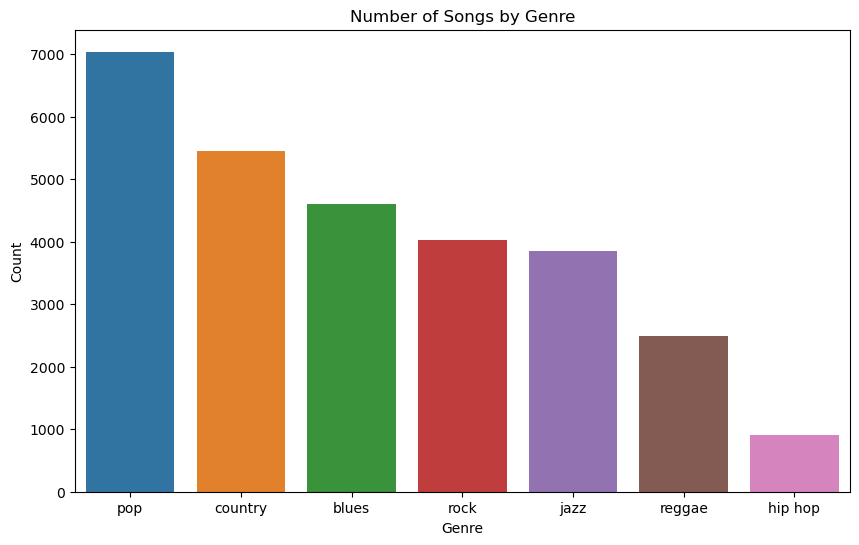

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=music_df, x='genre', order=music_df['genre'].value_counts().index) 

plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

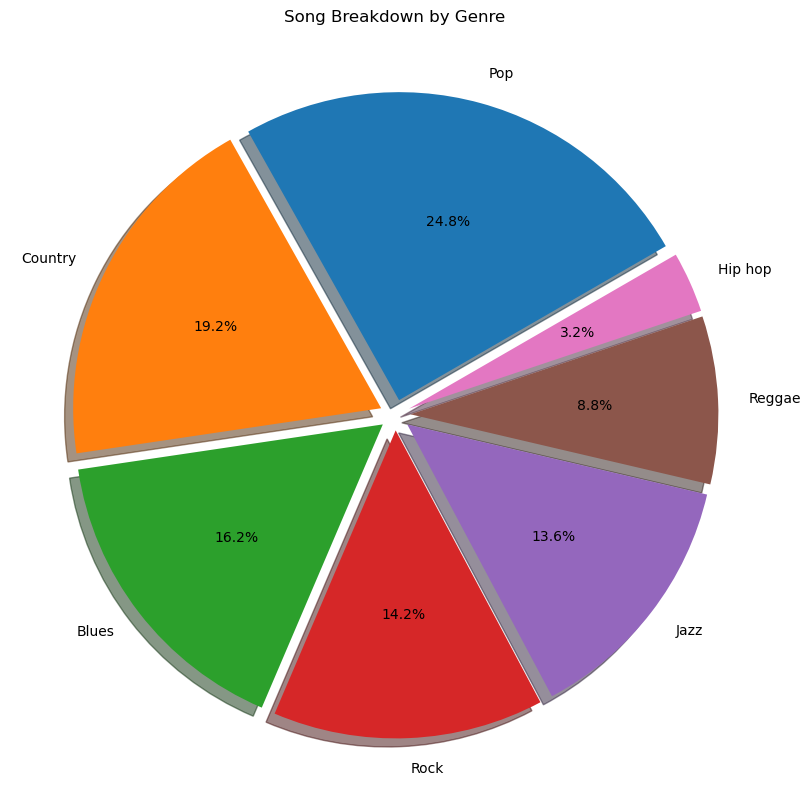

In [11]:
size = [7038, 5444, 4603, 4032, 3844, 2497, 904]
label = ['Pop', 'Country', 'Blues', 'Rock', 'Jazz', 'Reggae', 'Hip hop']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Song Breakdown by Genre')
plt.show()

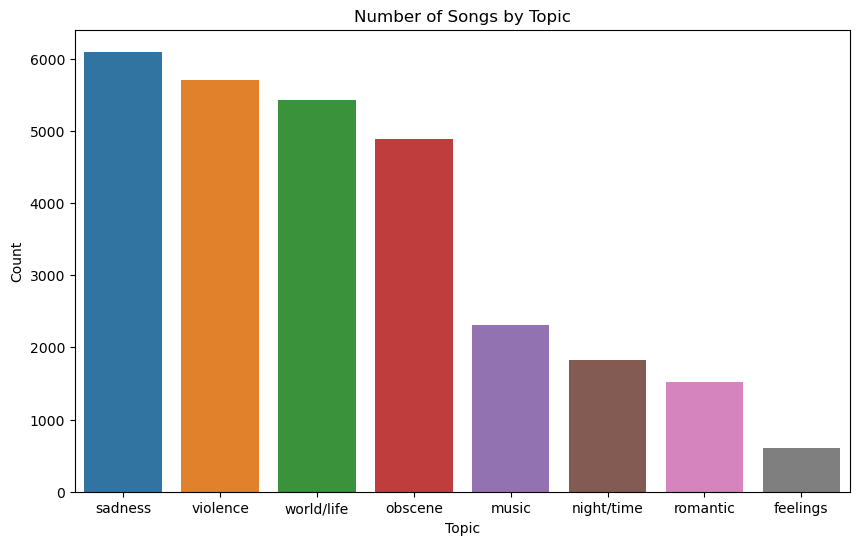

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=music_df, x='topic', order=music_df['topic'].value_counts().index) 

plt.title('Number of Songs by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

In [13]:
music_df['topic'].value_counts()


topic
sadness       6094
violence      5707
world/life    5419
obscene       4881
music         2303
night/time    1823
romantic      1523
feelings       612
Name: count, dtype: int64

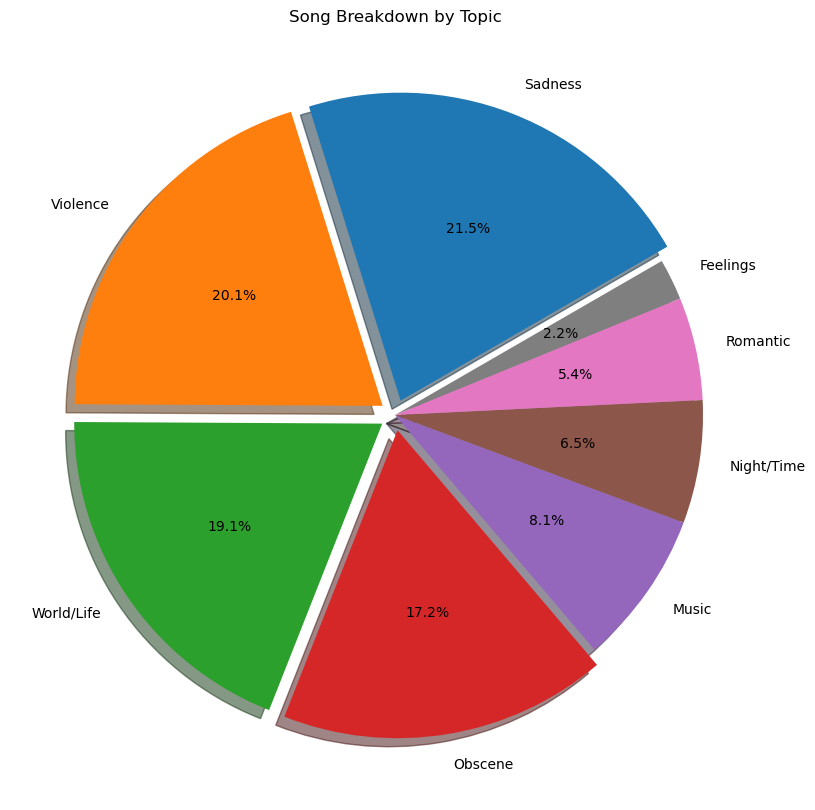

In [14]:
size = [6094, 5707, 5419, 4881, 2302, 1832, 1532, 612]
label = ['Sadness', 'Violence', 'World/Life', 'Obscene', 'Music', 'Night/Time', 'Romantic', 'Feelings']
explode = [0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Song Breakdown by Topic')
plt.show()

# Bivariate Analysis

I'll be taking a look at the distributions of each of the thematic columns.

Keep in mind that numbers on x axis are a score from 0 to 1 expressing how likely it is that a song’s lyrics are associated with the topic.

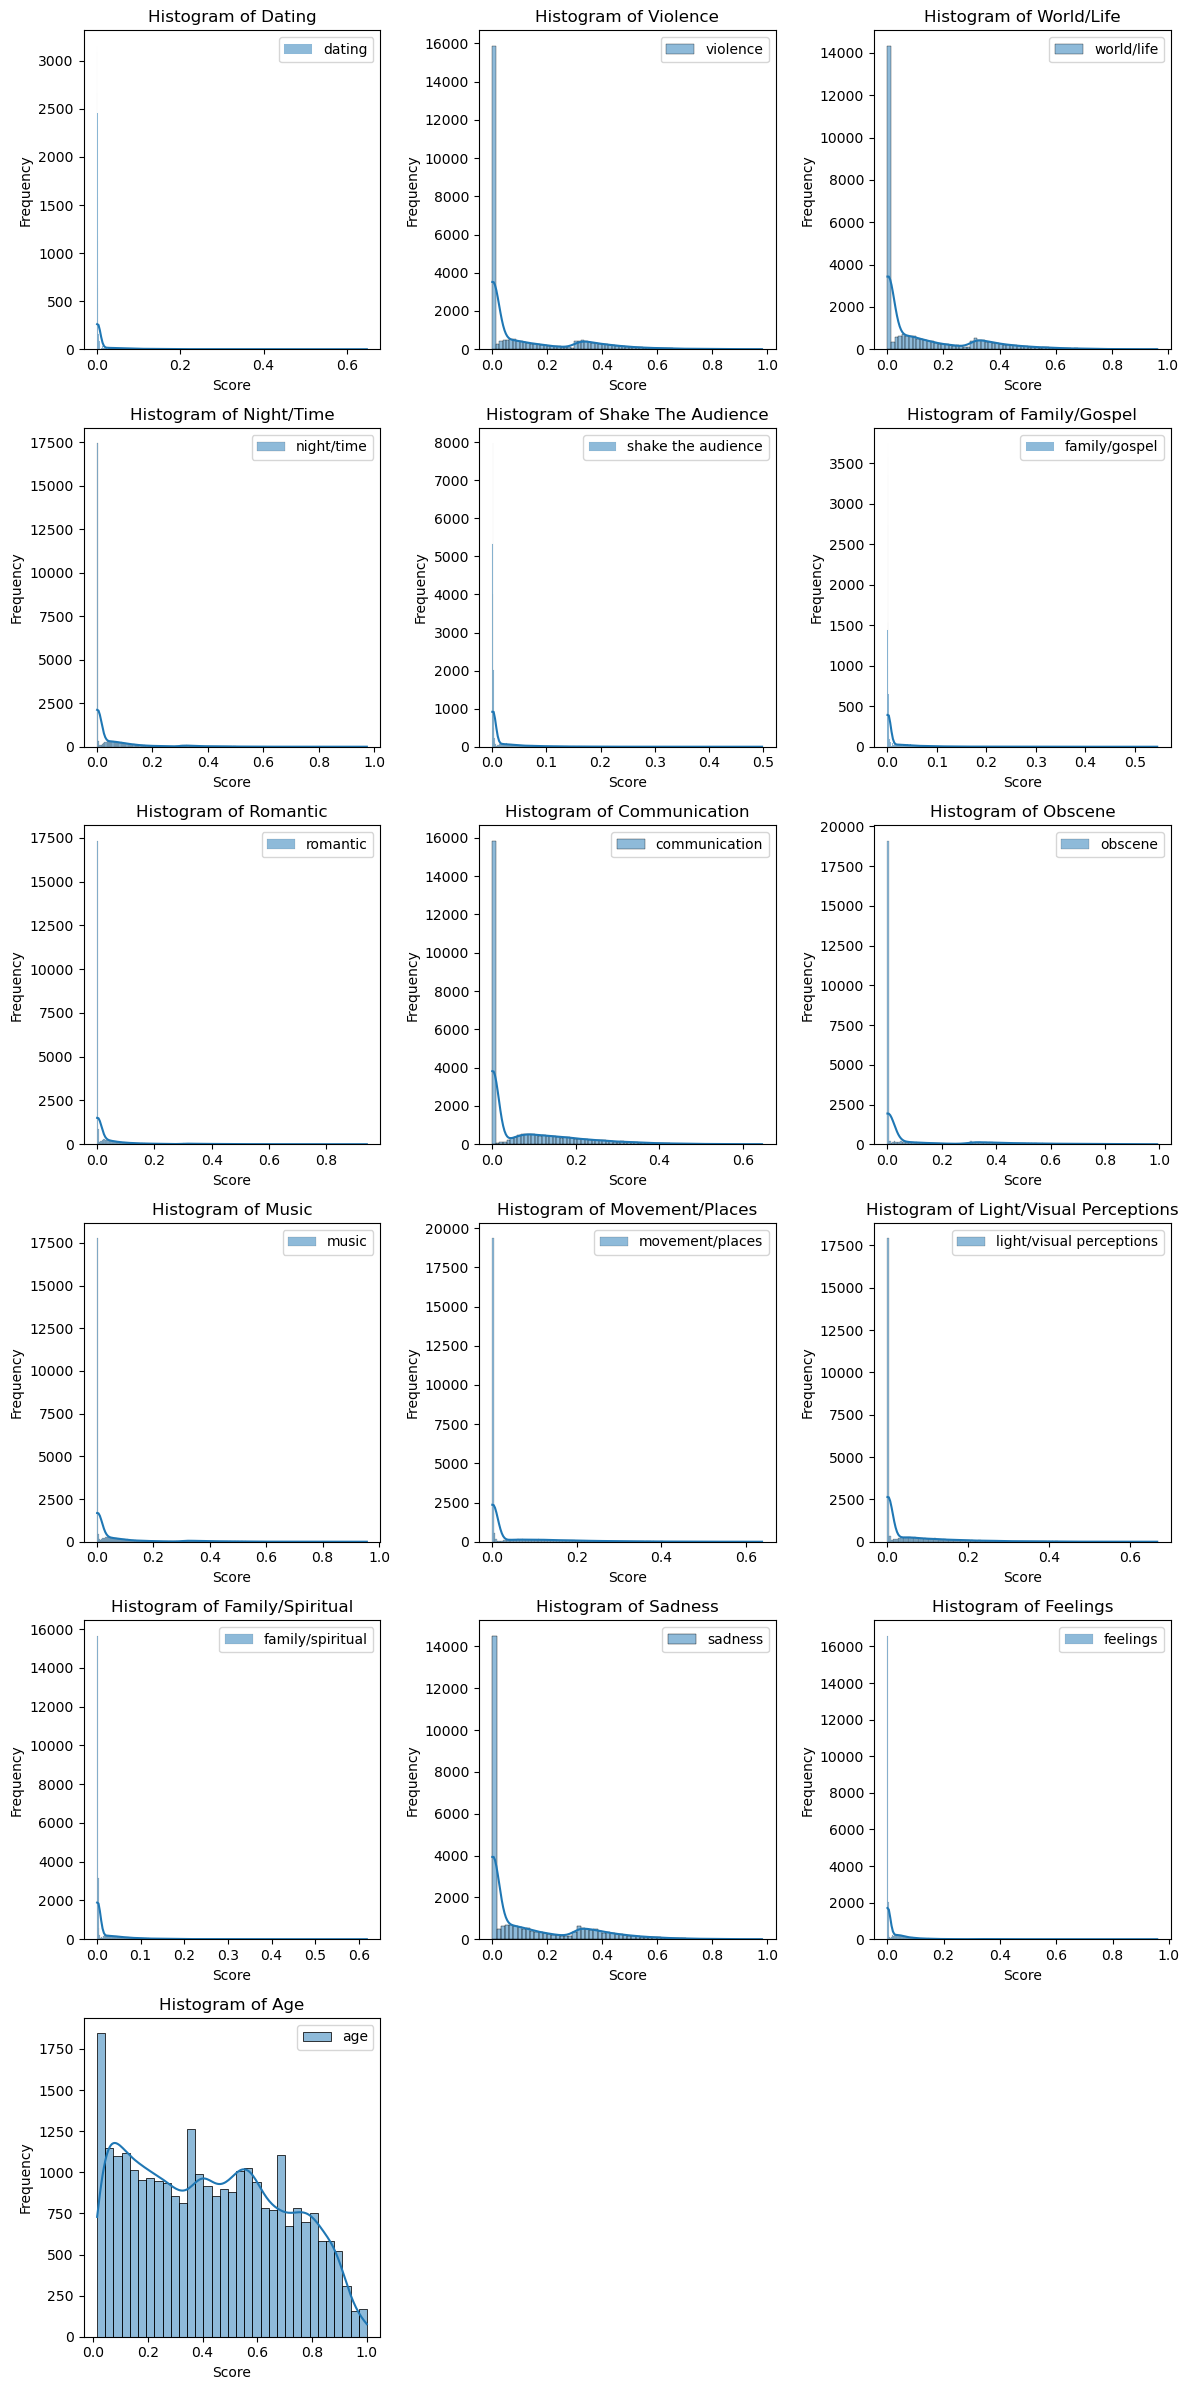

In [15]:
float64_cols = music_df.select_dtypes(include=['float64']).columns

# Set up the figure and subplots
num_cols = len(float64_cols)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
axes = axes.flatten()

# Create log-transformed histograms for each column
for i, col in enumerate(float64_cols):
    sns.histplot(music_df[col], kde=True, label=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col.title()}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Remove empty subplots
for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

GIven that these are all heavily right skewed, with the exception of Age, I'll visualize these distributions again but with a log transformation.

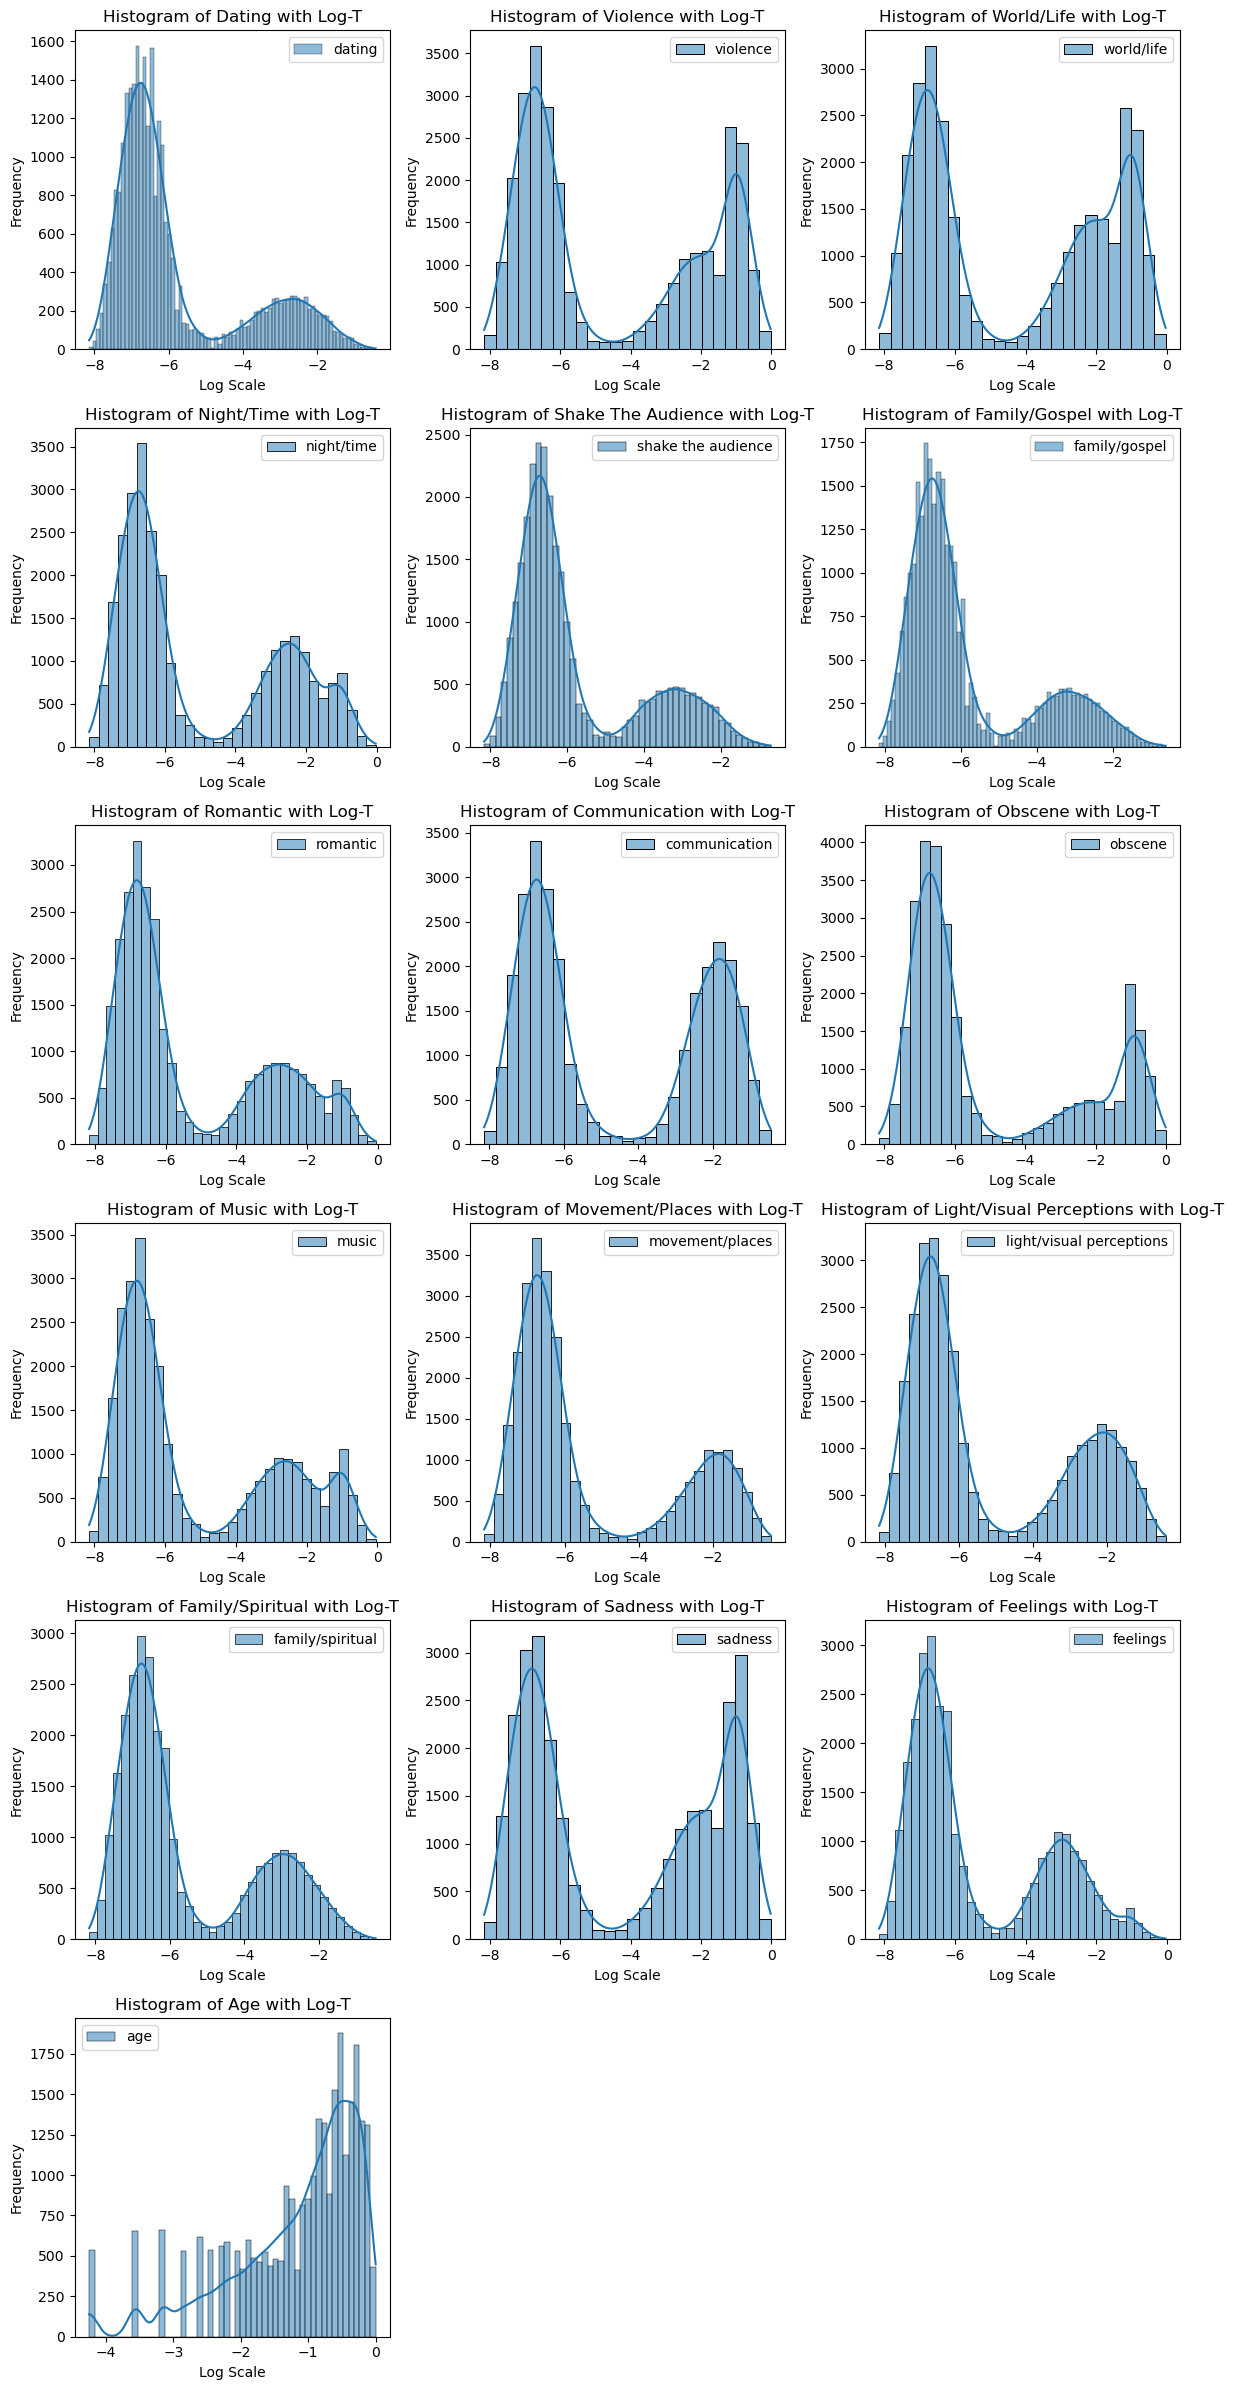

In [16]:
float64_cols = music_df.select_dtypes(include=['float64']).columns

# Set up the figure and subplots
num_cols = len(float64_cols)
num_rows = int(np.ceil(num_cols / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
axes = axes.flatten()

# Create log-transformed histograms for each column
for i, col in enumerate(float64_cols):
    sns.histplot(np.log(music_df[col]), kde=True, label=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col.title()} with Log-T')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Remove empty subplots
for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

It appears that all of the distibutions are bimodal, suggesting that within each thematic column scores either have very high or very low association scores.
I may decided to log transform all of these columns later during the pre processing stage, prior to standardization.

## The following charts display the log scale distributions of topic variables across each genre 

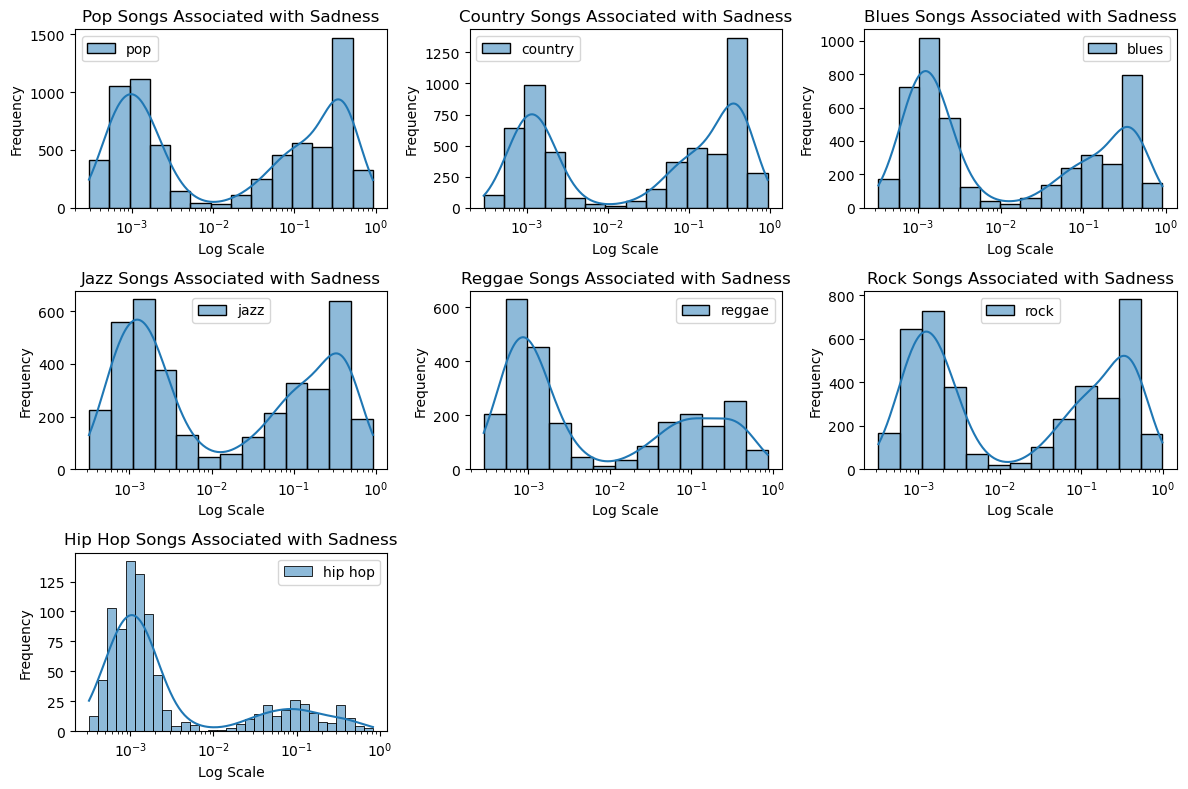

In [17]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['sadness'], kde=True, label=genre, ax=axes[i], log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Sadness')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

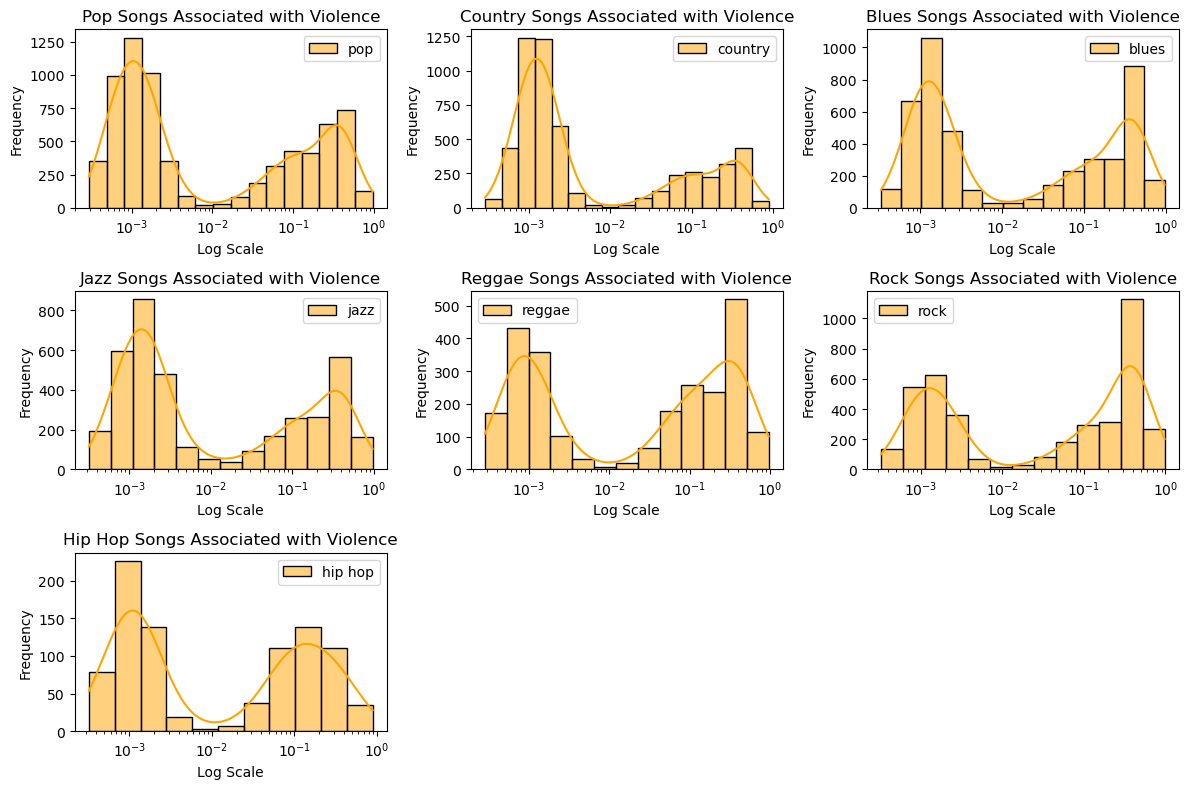

In [18]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['violence'], kde=True, label=genre, ax=axes[i], color='orange', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Violence')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

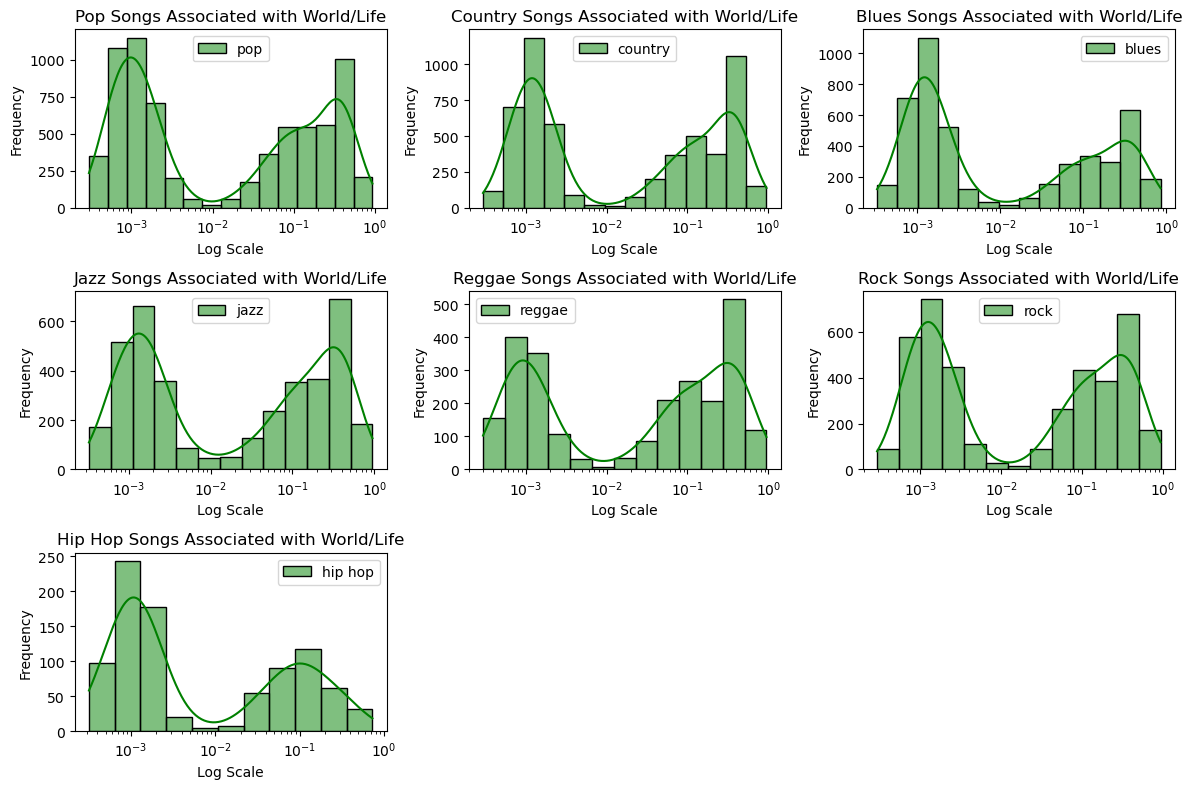

In [19]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['world/life'], kde=True, label=genre, ax=axes[i], color='green', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with World/Life')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

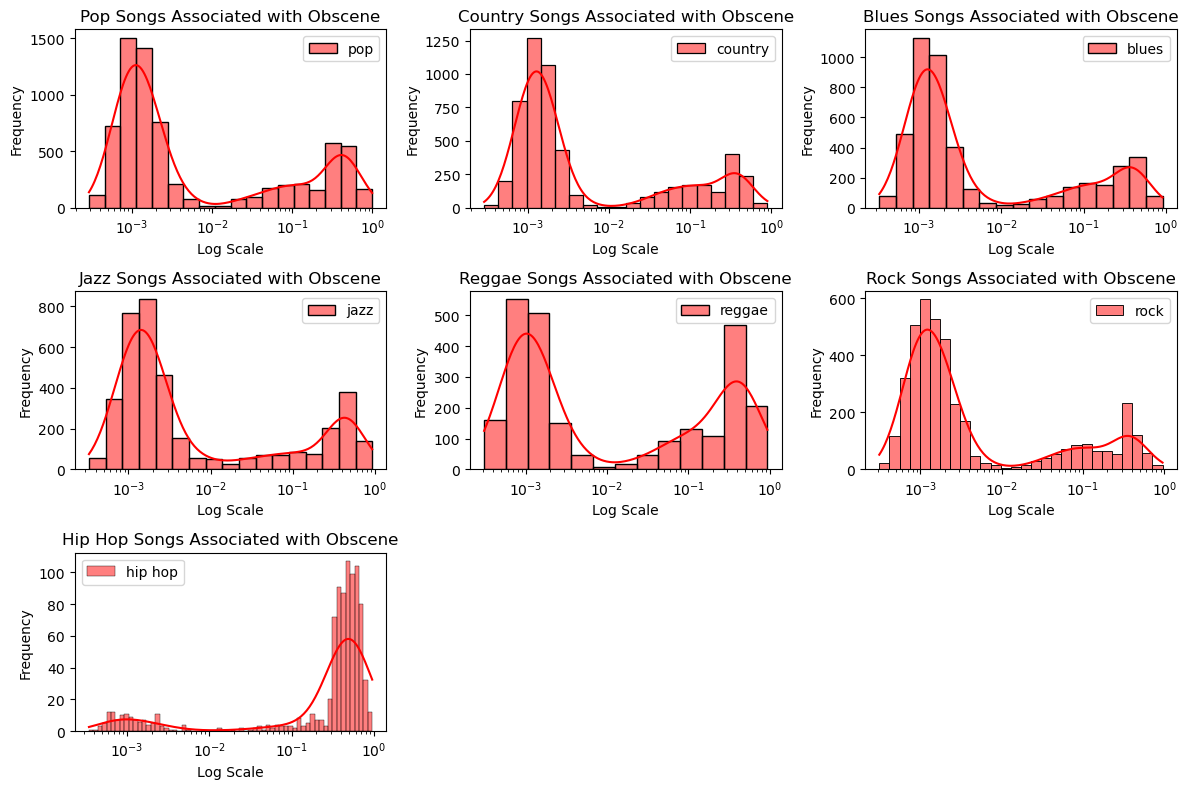

In [20]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['obscene'], kde=True, label=genre, ax=axes[i], color='red', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Obscene')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Initial investigation on how to handle outliers

In [21]:
obscene = music_df['obscene']

# Calculate the IQR (Interquartile Range)
Q1 = obscene.quantile(0.25)
Q3 = obscene.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the bounds
outliers = music_df[(music_df['obscene'] < lower_bound) | (music_df['obscene'] > upper_bound)]

outliers

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
10,28,liva weel,"drømmer man om den, vågner..",1951,pop,better sail midnight better dive pearl better ...,113,0.017090,0.026486,0.000774,...,0.079665,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,obscene,0.985714
12,33,frankie laine,necessary evil,1951,pop,come motherfucker spit shit minutes chillin bi...,173,0.000627,0.244358,0.083570,...,0.109129,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,obscene,0.985714
27,68,asha bhosle,gullyachi shapath,1952,pop,fuck fuck fuck rise fuck bitch know power face...,127,0.000693,0.040706,0.000693,...,0.000693,0.688167,0.000693,0.064938,0.122569,0.000693,0.000693,0.000693,obscene,0.971429
38,100,talat mahmood,ansoo to nahin hai ankhon men,1953,pop,yeah dance ceiling dance floor people come doo...,104,0.265570,0.000537,0.000537,...,0.000537,0.414400,0.000537,0.094683,0.033427,0.000537,0.000537,0.000537,obscene,0.957143
52,138,a. m. rajah,gopiparivrito,1954,pop,deal pharmaceuticals sell pills yesterday sist...,73,0.167089,0.219531,0.067068,...,0.075848,0.328817,0.000993,0.000993,0.000993,0.000993,0.000993,0.000993,obscene,0.942857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286


In [22]:
outliers_dropped = music_df['obscene'].drop(outliers.index)
outliers_dropped

0        0.000598
1        0.001284
2        0.002770
3        0.001548
4        0.001350
           ...   
28337    0.002392
28338    0.043787
28341    0.003096
28348    0.205476
28350    0.040241
Name: obscene, Length: 22992, dtype: float64

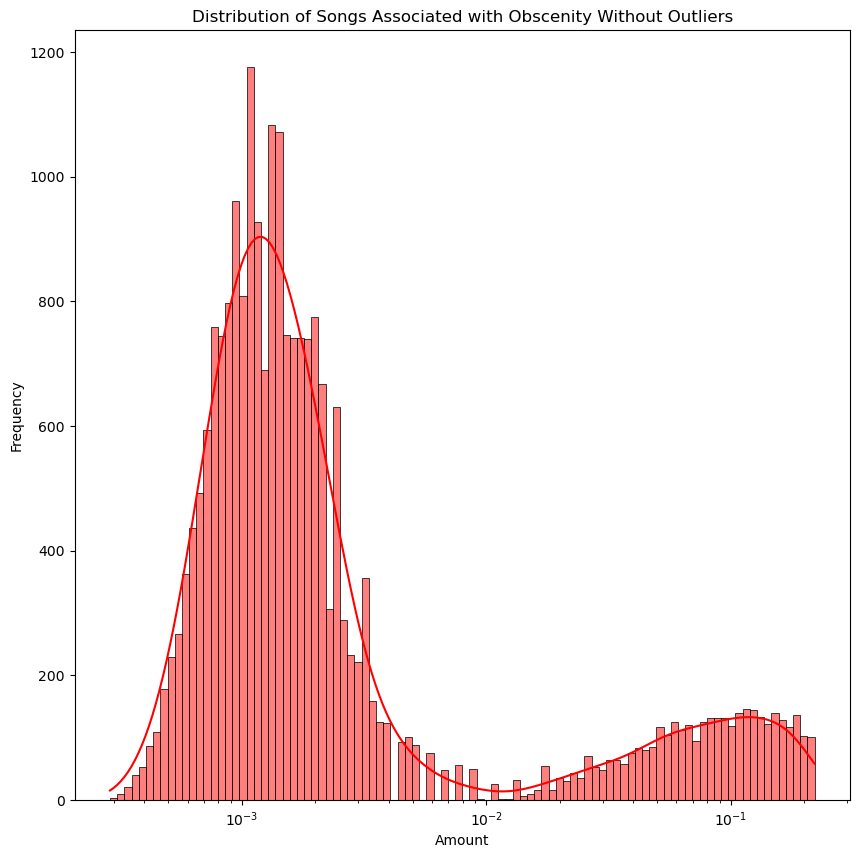

In [23]:
sns.histplot(outliers_dropped, kde=True, log_scale=True, color='red')

plt.title('Distribution of Songs Associated with Obscenity Without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

If using the IQR method on the 'obscene' column, we end up dropping about 1/5 of the data. (5370 / 28362)

My primary concern with this would be dropping too much data across all of the rows. In addition, dropping outliers in the obscene column has not had a drastic effect on the bimodality of the distribution.

Perhaps I'll try the 5th and 95th percentiles later.

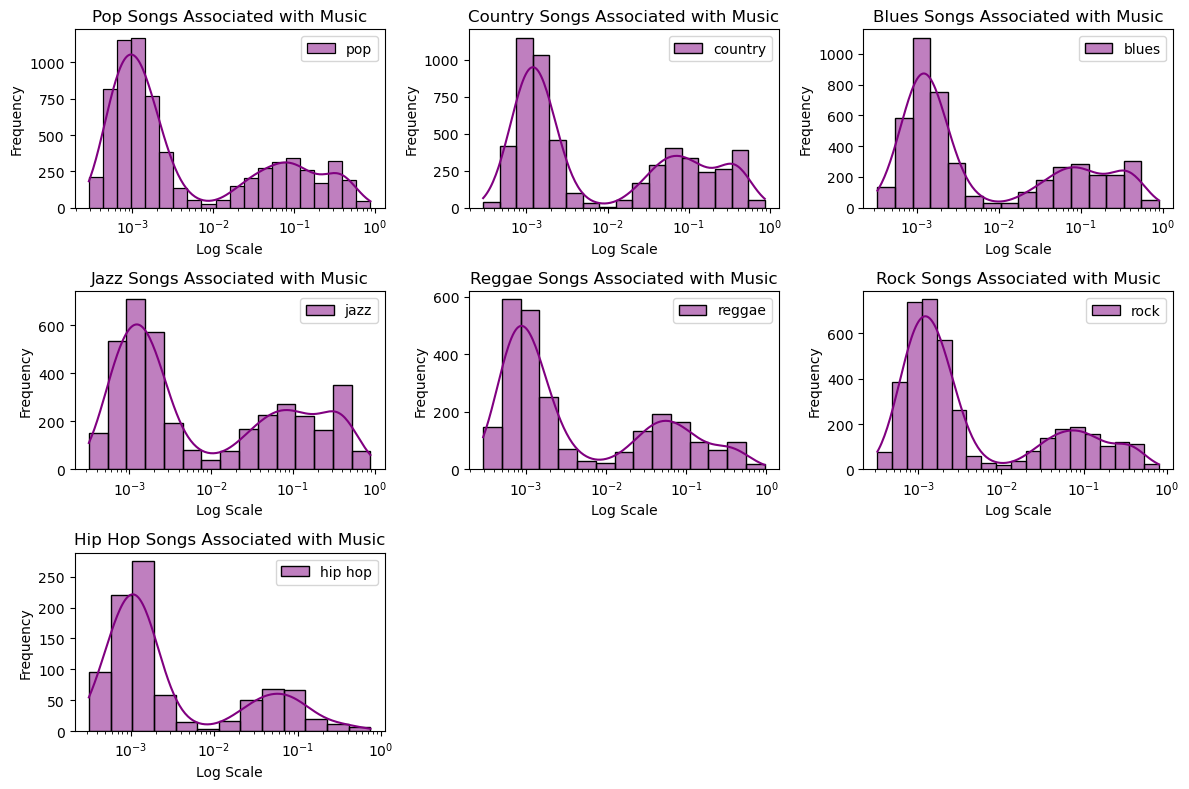

In [24]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['music'], kde=True, label=genre, ax=axes[i], color='purple', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Music')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

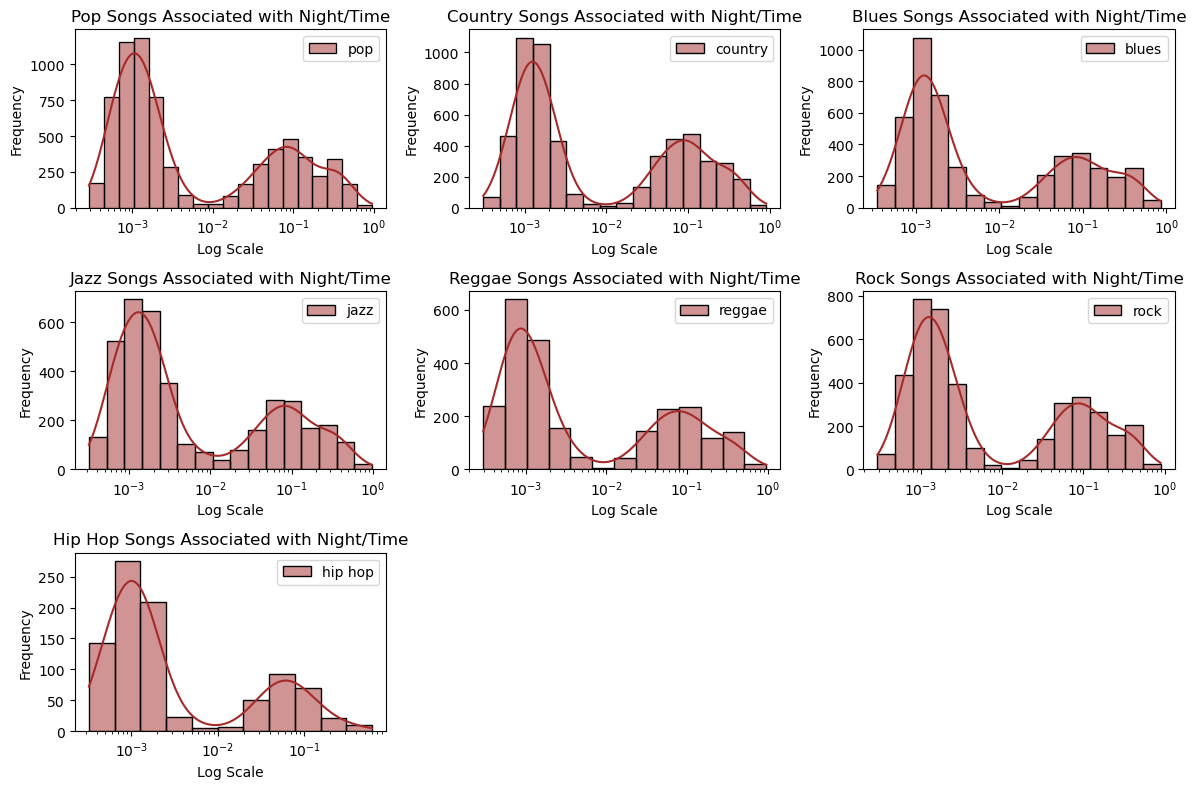

In [25]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['night/time'], kde=True, label=genre, ax=axes[i], color='brown', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Night/Time')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

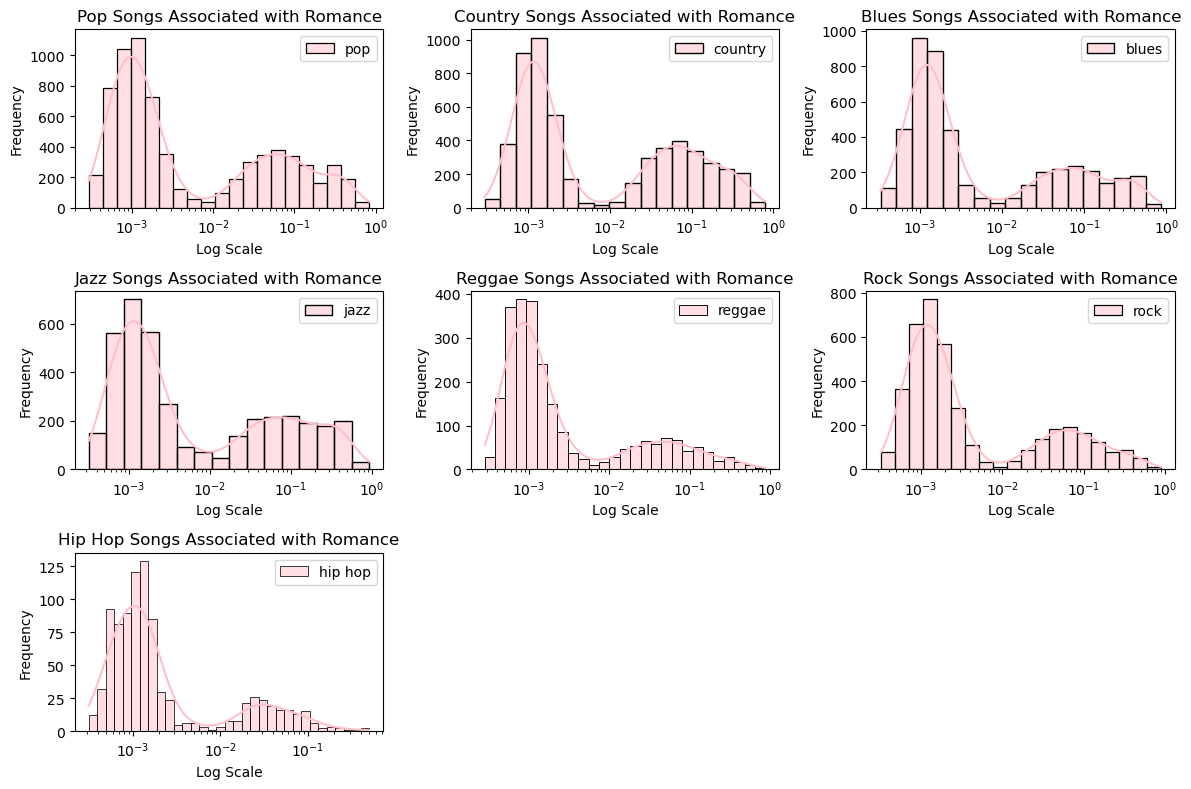

In [26]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['romantic'], kde=True, label=genre, ax=axes[i], color='pink', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Romance')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

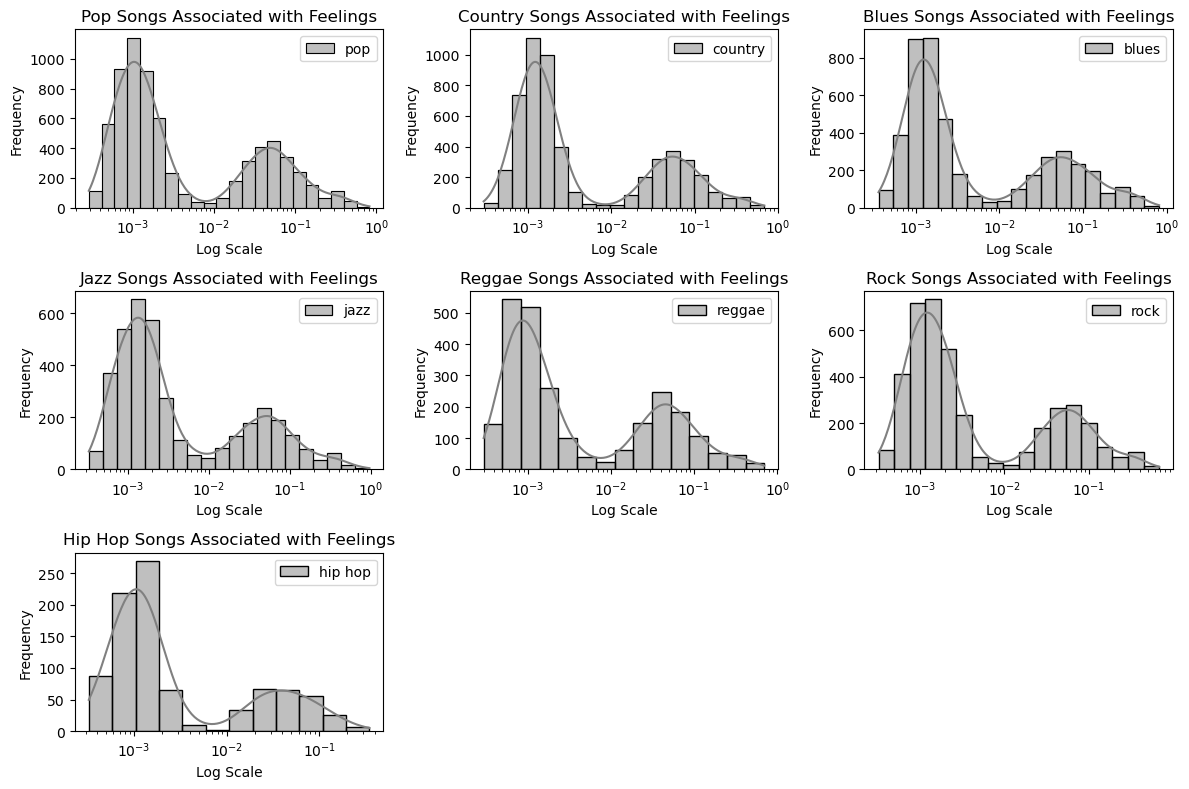

In [27]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Create a histogram for each genre
for i, genre in enumerate(music_df['genre'].unique()):
    sns.histplot(music_df[music_df['genre'] == genre]['feelings'], kde=True, label=genre, ax=axes[i], color='grey', log_scale=True)
    axes[i].set_title(f'{genre.title()} Songs Associated with Feelings')
    axes[i].set_xlabel('Log Scale')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')

plt.tight_layout()
plt.show()

## It appears that all topic column names are not within the topic column

In [28]:
music_df['topic'].value_counts()

topic
sadness       6094
violence      5707
world/life    5419
obscene       4881
music         2303
night/time    1823
romantic      1523
feelings       612
Name: count, dtype: int64

In [29]:
music_df['sadness']

0        0.380299
1        0.001284
2        0.002770
3        0.225889
4        0.068800
           ...   
28357    0.065664
28358    0.001284
28359    0.001504
28360    0.001196
28361    0.001012
Name: sadness, Length: 28362, dtype: float64

In [30]:
to_drop = ['sadness', 'violence', 'world/life', 'obscene', 'music', 'night/time', 'romantic', 'feelings', 'topic']
no_topic_music_df = music_df.drop(to_drop, axis = 1)
no_topic_music_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,shake the audience,family/gospel,communication,movement/places,light/visual perceptions,family/spiritual,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.000598,0.048857,0.263751,0.000598,0.000598,0.000598,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.001284,0.027007,0.001284,0.001284,0.212681,0.051124,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.250668,0.002770,0.002770,0.002770,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.021500,0.001548,0.001548,0.129250,0.001548,0.001548,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,0.435089,0.001350,0.001350,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.001284,0.203889,0.134955,0.001284,0.001284,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.039755,0.001504,0.001504,0.068684,0.001504,0.001504,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.048359,0.001196,0.001196,0.001196,0.202659,0.001196,0.014286


In [31]:
filtered_music_df = no_topic_music_df.drop(['Unnamed: 0', 'release_date', 'len', 'age'], axis=1)

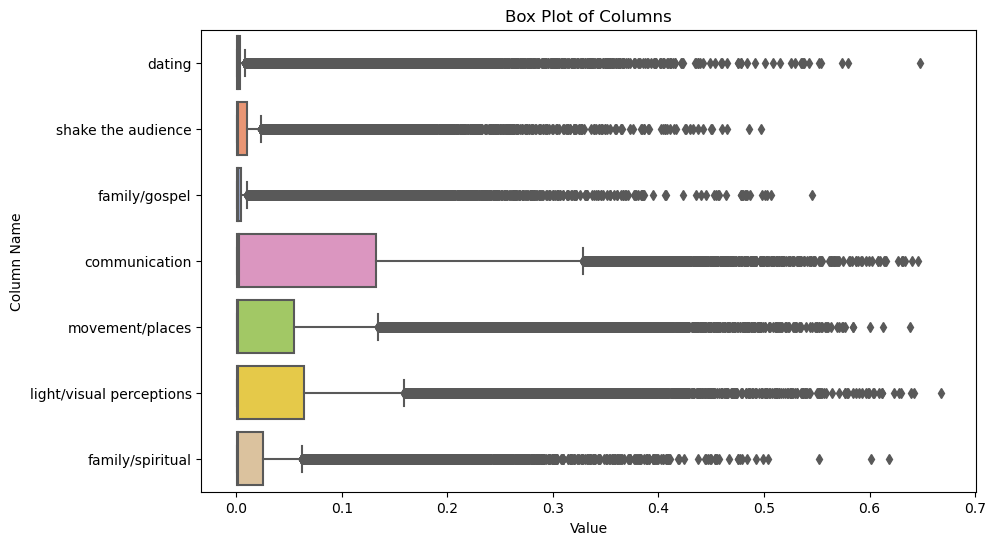

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_music_df, orient='h', palette='Set2')
plt.title('Box Plot of Columns')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

I'll log transform these as well

---

In [33]:
music_df['release_date'].value_counts()

release_date
2017    660
2018    653
2015    617
2009    596
2012    588
       ... 
1955    106
1952     59
1951     58
1950     51
1953     48
Name: count, Length: 70, dtype: int64

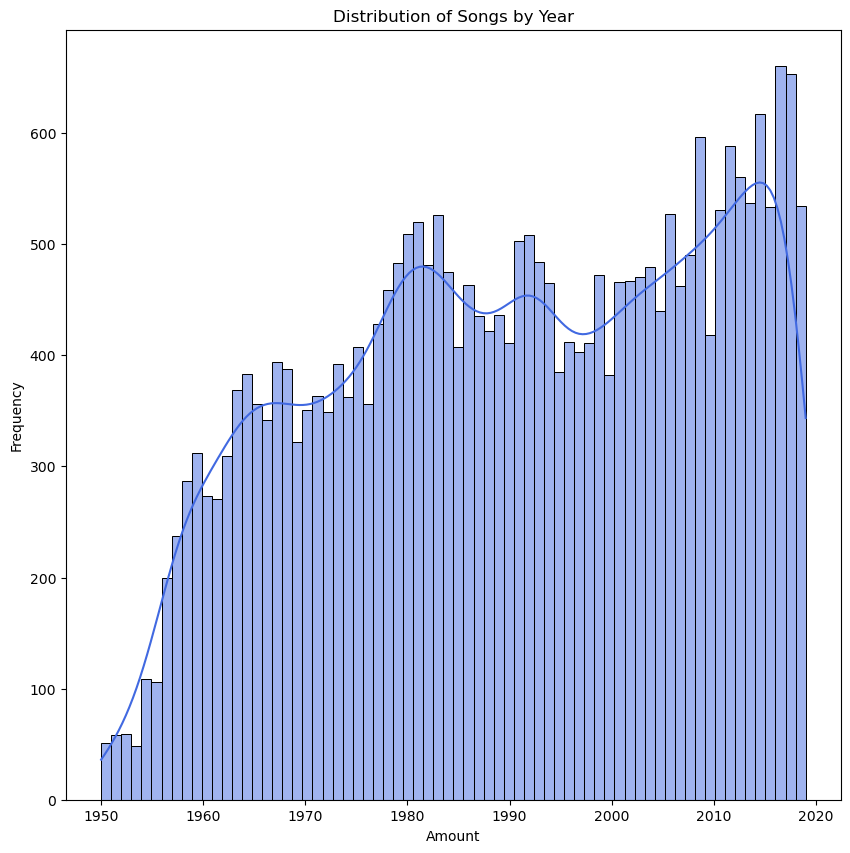

In [34]:
sns.histplot(music_df['release_date'], kde=True, color='royalblue', bins =70)

plt.title('Distribution of Songs by Year')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

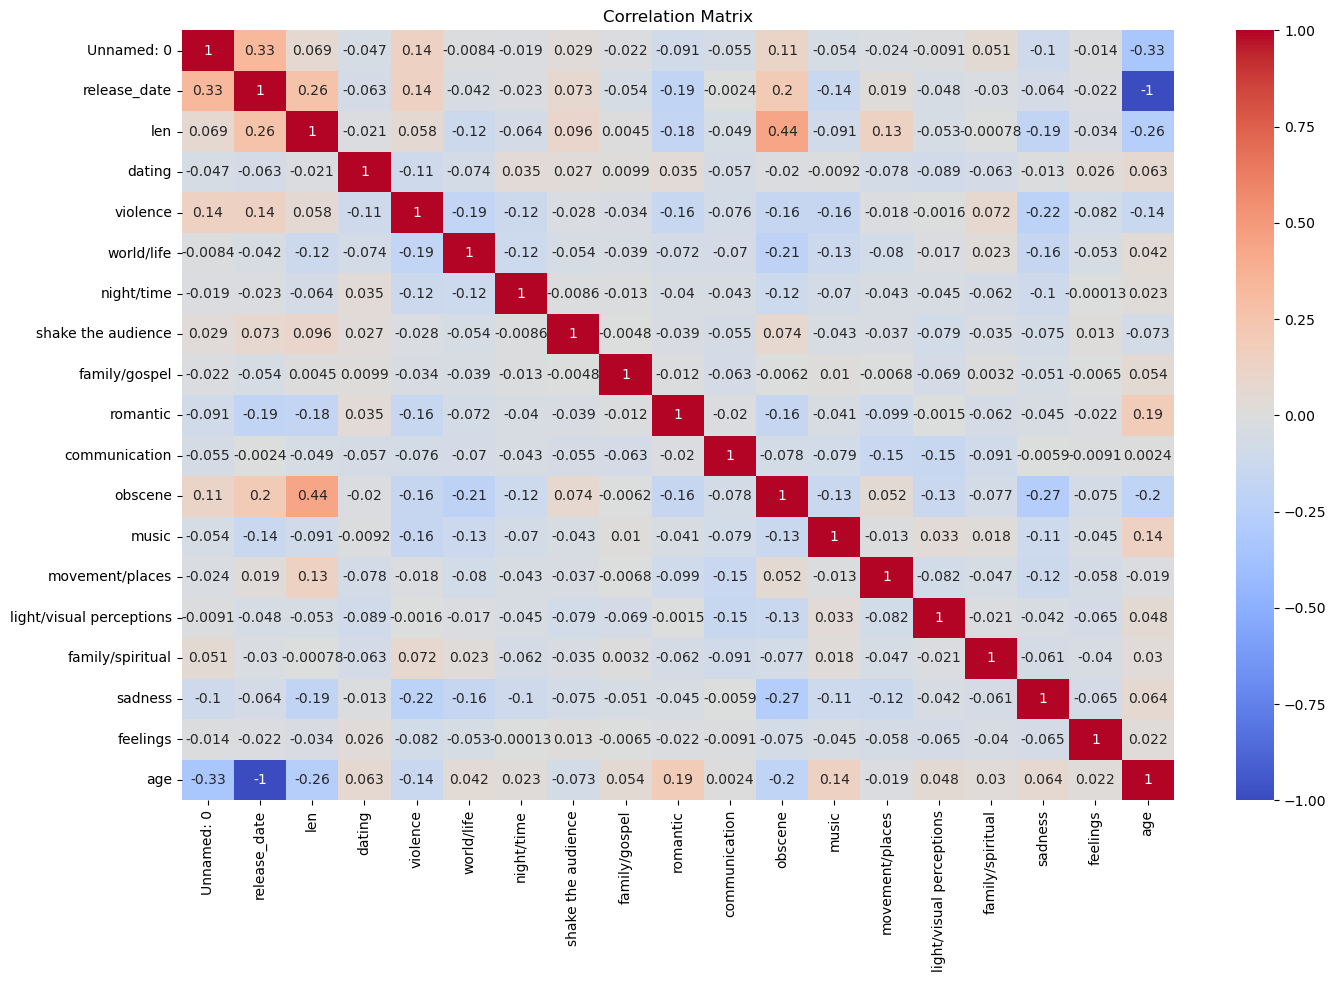

In [35]:
# Correlation matrix
correlation_matrix = music_df.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Age and release date have a perfect negative correlation.

There is a slight positive correlation between length and release date, suggesting that number of lyrics increase as time of release increases.

Length and obscene have a positive correlation. My intuition tells me that this is due to hip hop songs containing more lyrics on average than other songs, as well as hip hop songs having an association with obscene topics.

# Investigate collinearity between certain columns

My intution tells me that some of these columns may contain similar information based on their description

In [36]:
music_df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

<Axes: xlabel='family/gospel', ylabel='family/spiritual'>

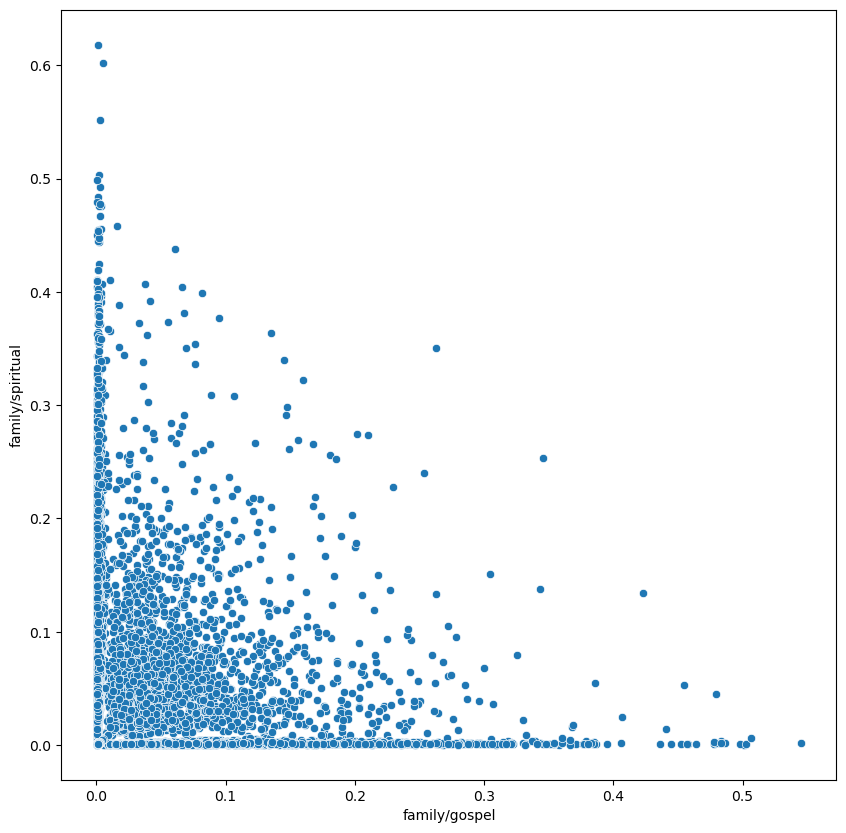

In [37]:
sns.scatterplot(data=music_df, x='family/gospel', y='family/spiritual')

Just as we saw in the distributions, we see a lot of songs that had low scores for each theme. I'm going to investigate linearity by dropping songs that have a score lower than 0.01. Why 0.01? Becuase we can see from the bimodal distributions that 10^-2 or 0.01 is the valley of the two bimodal distributions. My hypothesis is that by only capturing the distribution that has a strong association in each theme, we could visually inspect whether these groups of a correlation.

In [38]:
high_scoring_family_gospel = music_df[music_df['family/gospel'] > 0.01]
high_scoring_family_spiritual = music_df[music_df['family/spiritual'] > 0.01]

print(high_scoring_family_gospel.shape)
print(high_scoring_family_spiritual.shape)

(6597, 24)
(8595, 24)


<Axes: xlabel='family/gospel', ylabel='family/spiritual'>

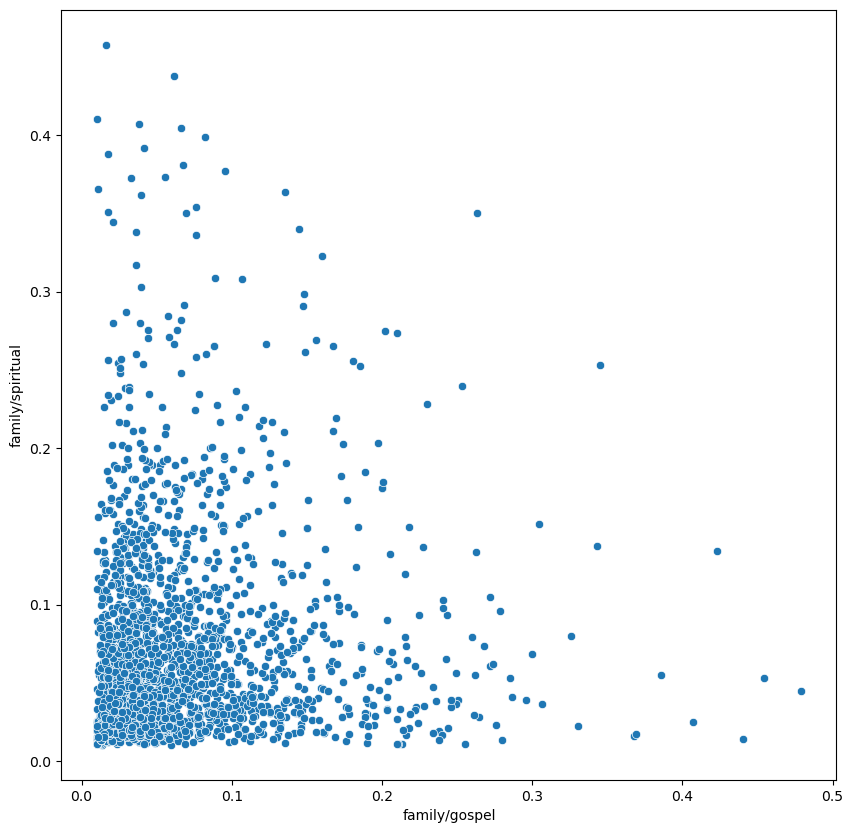

In [40]:
sns.scatterplot(x=high_scoring_family_gospel['family/gospel'] ,y=high_scoring_family_spiritual['family/spiritual'] )

Let's see what the scatterplot would look like with log transformed data

In [41]:
music_df.loc[:,'log_transformed_family/gospel'] = np.log(music_df['family/gospel'].copy())
music_df.loc[:,'log_transformed_family/spiritual'] = np.log(music_df['family/spiritual'].copy())

<Axes: xlabel='log_transformed_family/gospel', ylabel='log_transformed_family/spiritual'>

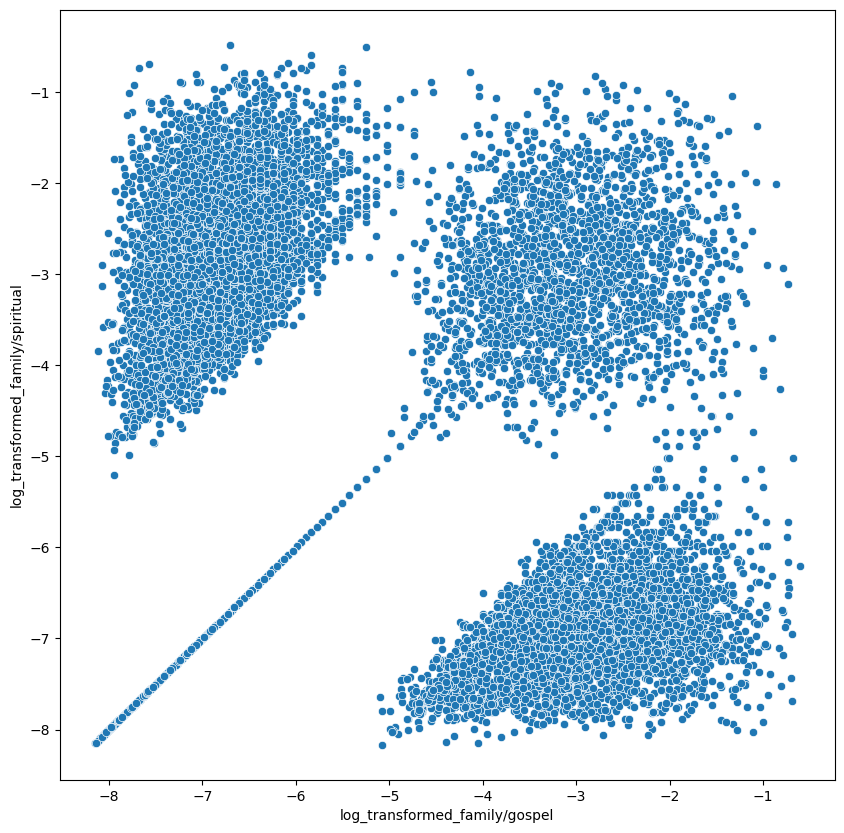

In [42]:
sns.scatterplot(data=music_df, x='log_transformed_family/gospel', y='log_transformed_family/spiritual')

This is a very interesting chart, although I'm not exactly sure what to make of it. I'll investigate further in the preprocessing step.

Let's try with log transformed data on high performing scores

In [43]:
# df['transformed_column'] = np.log(df['column_name'])
# df.loc[:, 'transformed_column'] = np.log(df['column_name'].copy())
high_scoring_family_gospel.loc[:,'log_transformed_family/gospel'] = np.log(high_scoring_family_gospel['family/gospel'].copy())
high_scoring_family_spiritual.loc[:,'log_transformed_family/spiritual'] = np.log(high_scoring_family_spiritual['family/spiritual'].copy())


/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_62124/153971773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_scoring_family_gospel.loc[:,'log_transformed_family/gospel'] = np.log(high_scoring_family_gospel['family/gospel'].copy())
/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_62124/153971773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_scoring_family_spiritual.loc[:,'log_transformed_family/spiritual'] = np.log(high_scoring_family_spiritual['family/spiritual'].

<Axes: xlabel='log_transformed_family/gospel', ylabel='log_transformed_family/spiritual'>

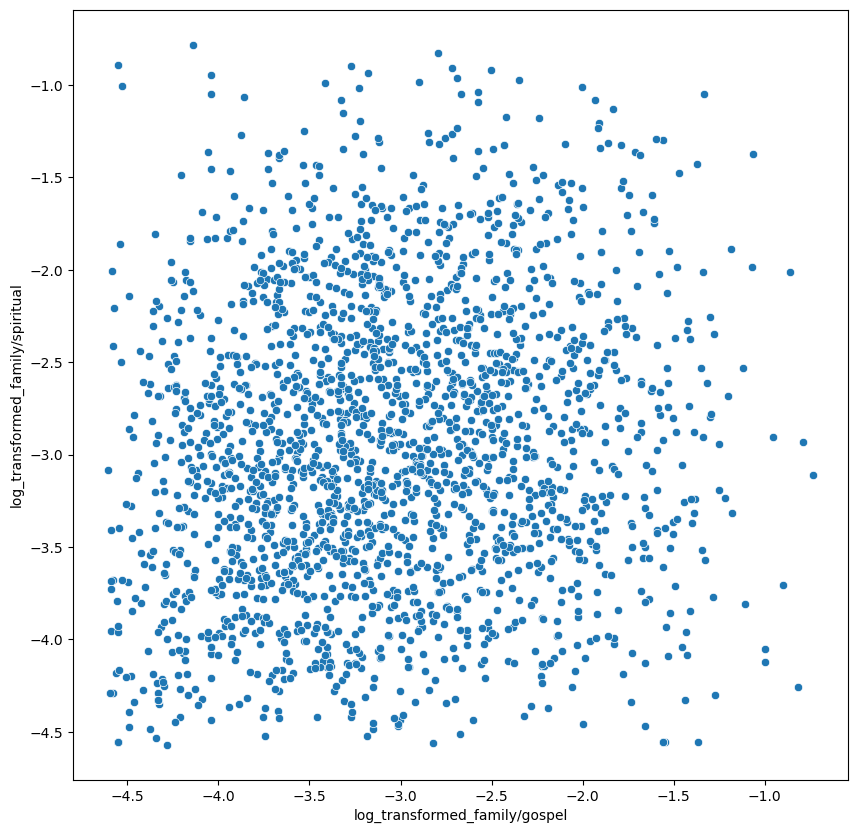

In [44]:
sns.scatterplot(x=high_scoring_family_gospel['log_transformed_family/gospel'] ,y=high_scoring_family_spiritual['log_transformed_family/spiritual'] )

# Hypothesis

Given that all of our thematic columns are heavily right skewed, I've decided that I will log transform all of the thematic columns in the pre processing step.

Plans for preprocessing:
- Log transform thematic columns
- Experiement and decide how to handle outliers (I tried the IQR method above and it resulted with too many rows being dropped)
- Drop text columns
- Visualize newly created columns for correlations
- Drop erroneous thematic columns
- One hot encode genre and catgorical variables
- Standardize data


Furthermore, I've never run a distance algorithm such as kmeans before. I'm curious to see if the output will be different based on whether the data is log transformed or not. So, I'll run multiple models, one with log transformed data and one without. I'll determine how to deal with outliers accordingly.